Current Plot: KEY2D2
Time interval: 10/101
Position: [10, -929]
-------------------------
Current Plot: KEY2D2
Time interval: 100/101
Position: [100, -541]
-------------------------
Current Plot: KEY2D2
Time interval: 10/101
Position: [1, 1000]
-------------------------
Current Plot: KEY2D2
Time interval: 100/101
Position: [100, -541]
-------------------------
[101, 0]
[0, 0]
0.0


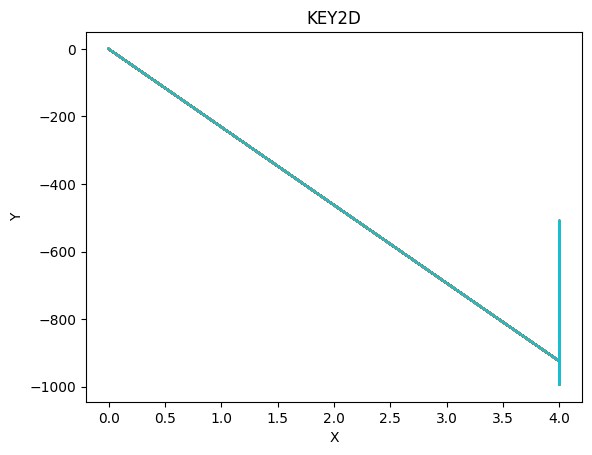

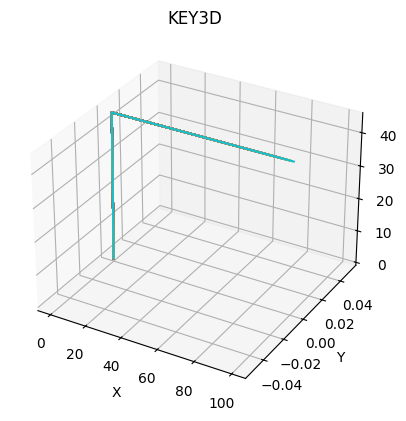

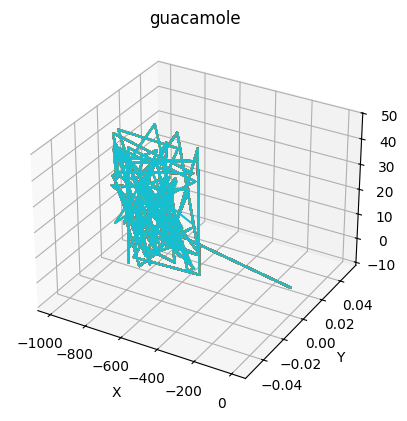

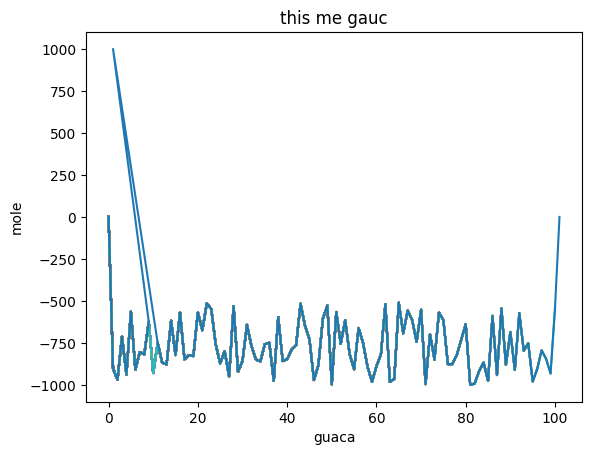

In [ ]:
'''
Plotting system
Works using a Dictionary to contain plot objects (plotObject).
Each plot object is assigned a unique 'key' upon creation
plotObject can be retrived through this key using plotAt
Plots are updated with the tick function; each tick specifying what needs to be updated
Various functions can be run on a plotObject
'''


import sys
if not ('numpy' in sys.modules and 'matplotlib' in sys.modules):
    !{sys.executable} -m pip install numpy
    !{sys.executable} -m pip install matplotlib

import numpy as np
import matplotlib.pyplot as plt 
import random
import time 

#General set up
plotID = 0
plotDict = {}
interval = 1
plt.ion() #Interactive ON


#Plot Object Class
class plotObject:
    key = ""
    storedID = 0
    '''
    Stored ID may seem to fill the sign role as the key; but storedID represents
    the internal numerical system matplotlib uses to track plots.
    Meanwhile, the key is the external way the user should use to track plots.
    '''
    figData = [[0], [0]]
    projection_3d: bool

    #Initialization
    def __init__(self, key: str, projection_3d, x_axis, y_axis, z_axis, title):
        global plotID #This is necessary to keep track of an the internal method matplotlib keeps plots
        global plotDict #Dictionary that hoods plots

        #Sets internal ID stuff
        self.storedID = plotID
        plotID += 1

        self.projection_3d = projection_3d #Determines 3D mode
        self.key = key #Sets key (what the user refers to the plot)

        #Projection set-up
        if not projection_3d:
            self.figData = [[0], [0]]
            fig2D = plt.figure(plotID)
        else:
            self.figData = [[0], [0], [0]]
            fig3D = plt.figure(plotID).add_subplot(projection='3d')
            fig3D.set_zlabel(z_axis)
        
        #Formatting and final key dictionary assignment
        plt.xlabel(x_axis)
        plt.ylabel(y_axis)
        plt.title(title)
        plotDict[key] = self

    #Default 2D Graph Declaration
    def default2D(key: str): 
        return plotObject(key, False, "X", "Y", "", key)
    
    #Default 3D Graph Declaration
    def default3D(key: str): 
        return plotObject(key, True, "X", "Y", "Z", key)

    #Get size
    def getDataSize(self):
        figDataSize = len(self.figData[0])
        return figDataSize
    
    #Getter at time
    def getDataAtTime(self, time: int):
        timeData = []
        timeData.append(self.figData[0][time])
        timeData.append(self.figData[1][time])
        if self.projection_3d:
            timeData.append(self.figData[2][time])
        return timeData
    
    #Returns average rate of change over whole interval
    def getDataAROC(self):
        #Currently broken
        AROC = 0
        first_point = self.getDataAtTime(0)
        second_point = self.getDataAtTime(self.getDataSize()-1)
        print(second_point)
        print(first_point)
        AROC = (second_point[1] - first_point[1])/(second_point[0] - first_point[0])
        return AROC

    def getDataIROC(self):
        #Currently broken
        pass

    def getDataArea(self):
        #Currently broken
        pass

    #Setter at time
    def setDataAtTime(self, time: int, new_x = 0, new_y = 0, new_z = 0):
       self.figData[0][time] = new_x
       self.figData[1][time] = new_y
       if self.projection_3d:
           self.figData[2][time] = new_z

    #Full report with stylization
    def reportAtTime(self, time: int):
        print("Current Plot: " + self.key)
        print("Time interval: " + str(time) + "/" + str(self.getDataSize()))
        print("Position: " + str(self.getDataAtTime(time)))
        print("-------------------------")


#Get object out of plotDict
def plotAt(key: str):
    return (plotDict[key])

''''
Tick, updates a graph
Dynamically adpatable with optional x, y, and z inputs 
'''
def tick(key, x = None, y = None, z = None):
    figureID = plotAt(key).storedID
    data = plotAt(key).figData
    projection_3d = plotAt(key).projection_3d
    plt.figure(figureID)

    # X Inputs
    if x != None:
        data[0].append(x) #Y-Data (The actual data)
    else:
        prev_time = data[0][len(plotAt(key).figData[0])-1] #Log previous time
        data[0].append(prev_time + interval) #X-Data (Previous time + tick interval)
    
    # Y Inputs
    if y != None:
        data[1].append(y) #Y
    else: 
        data[1].append(0)

    # Z Inputs
    if z != None:
        data[2].append(z) #Z
    else:
        if projection_3d == True:
            data[2].append(0)
    
    # Final report
    if projection_3d == False:
        plt.plot(data[0], data[1]) 
    else:
        plt.plot(data[0], data[1], data[2]) 




#Test stuff
plotObject.default2D("KEY2D")
plotObject("KEY2D2", False, "guaca", "mole", "", "this me gauc")
plotObject.default3D("KEY3D")
plotObject.default3D("guacamole")

for i in range(100):
    tick("KEY2D", x=4, y=random.randrange(-1000, -500))
    tick("KEY2D2", y=random.randrange(-1000, -500))
    tick("KEY3D", z=45)
    tick("guacamole", x=random.randrange(-1000, -500), z=random.randrange(-10, 50))
    #plotAt("guacamole").reportAtTime(i)

plotAt("KEY2D2").reportAtTime(10)
plotAt("KEY2D2").reportAtTime(plotAt("KEY2D2").getDataSize()-1)
plotAt("KEY2D2").setDataAtTime(10, 1, 1000, 1000)
plotAt("KEY2D2").reportAtTime(10)
plotAt("KEY2D2").reportAtTime(plotAt("KEY2D2").getDataSize()-1)

tick("KEY2D2")

print(plotAt("KEY2D2").getDataAROC())

